In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Time spent on App and earning.csv')

In [3]:
df.head()

,Time on App,Yearly Amount Spent
0,12.655651,587.951054
1,11.109461,392.204933
2,11.330278,487.547505
3,13.717514,581.852344
4,12.795189,599.406092


In [4]:
df['Time on App'][0]

12.655651150000001

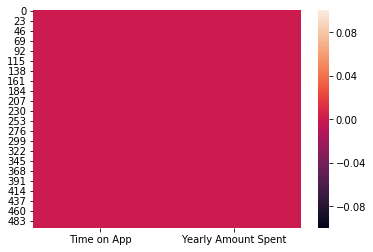

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Time on App,Yearly Amount Spent
count,500.000000,500.000000
mean,12.052488,499.314038
std,0.994216,79.314782
min,8.508152,256.670582
25%,11.388153,445.038277
50%,11.983231,498.887875
75%,12.753850,549.313828
max,15.126994,765.518462


,Time on App,Yearly Amount Spent
Time on App,1.000000,0.499328
Yearly Amount Spent,0.499328,1.000000


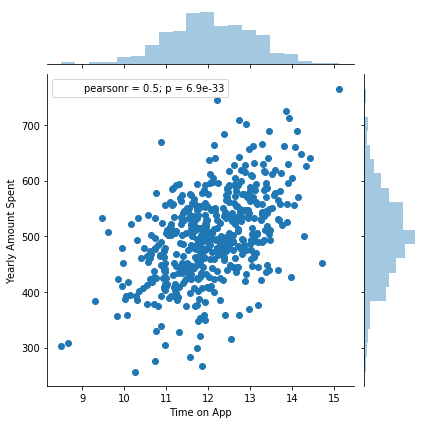

In [7]:
sns.jointplot(df['Time on App'], df['Yearly Amount Spent'])
df.corr()

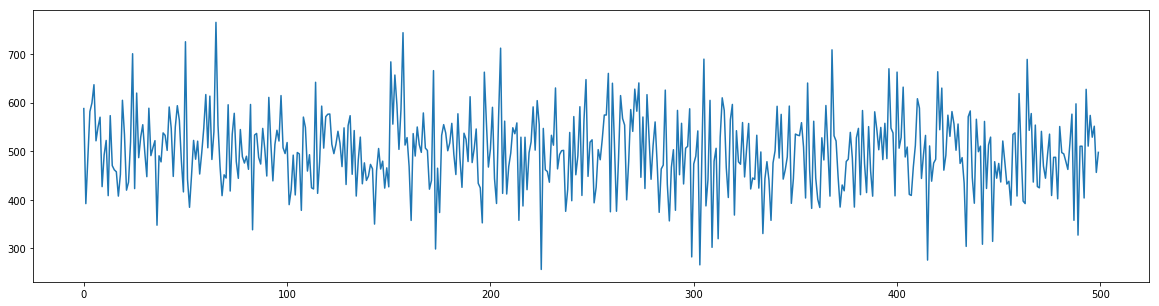

In [9]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(df['Yearly Amount Spent'])

In [29]:
X = df['Time on App']
y = df['Yearly Amount Spent']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [33]:
X_train2 = X_train[0:300]
cv_X_train = X_train[300:400]
y_train2 = y_train[0:300]
cv_y_train = y_train[300:400]

In [93]:
init_m = 0
init_b1 = 0
learning_rate = 0.001
num_iteration = 500
store_m = []
store_b1 = []
# number of traiing example here is just 1(time on app), so 1/m is just 1


# training set
def minimize_m_b1(X_train2,y_train2, m, b1, learning_rate):
    N = int(len(X_train2))
    minimize_m = m
    minimize_b1 = b1
    for i in range(0, len(X_train2)):
        x = X_train2[i]
        y = y_train2[i]
        minimize_m += ( (m + b1 * x) - y)
        minimize_b1 += ( (m + b1 * x) - y) * x
    minimized_m = m - (learning_rate *(1/N) * minimize_m)
    minimized_b1 = b1 - (learning_rate * (1/N) * minimize_b1)
    store_m.append(minimized_m)
    store_b1.append(minimized_b1)
    return [minimized_m, minimized_b1]


def run_minimize_m_b1(X_train2,y_train2,init_m, init_b1, learning_rate, num_iteration):
    m = init_m
    b1 = init_b1
    for i in range(num_iteration):
        m,b1 = minimize_m_b1(X_train2,y_train2, m, b1, learning_rate)
    return [m, b1]


[m, b1] = run_minimize_m_b1(X_train2,y_train2, init_m, init_b1, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b1)

intercept:  3.44358658784 Slope:  41.18129445


In [94]:
# cross validation set

def minimize_m_b1(cv_X_train,cv_y_train, m, b1, learning_rate):
    N = int(len(cv_X_train))
    minimize_m = m
    minimize_b1 = b1
    for i in range(0, len(cv_y_train)):
        x = cv_X_train[i]
        y = cv_y_train[i]
        minimize_m += ((m + b1 * x) - y)
        minimize_b1 += ((m + b1 * x) - y) * x
    minimized_m = m - (learning_rate * (1/N)* minimize_m)
    minimized_b1 = b1 - (learning_rate * (1/N)* minimize_b1)
    return [minimized_m, minimized_b1]


def run_minimize_m_b1(cv_X_train,cv_y_train,init_m, init_b1, learning_rate, num_iteration):
    m = init_m
    b1 = init_b1
    for i in range(num_iteration):
        m,b1 = minimize_m_b1(cv_X_train,cv_y_train, m, b1, learning_rate)
    return [m, b1]


[m1, b11] = run_minimize_m_b1(cv_X_train,cv_y_train, init_m, init_b1, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b1)

intercept:  3.44358658784 Slope:  41.18129445


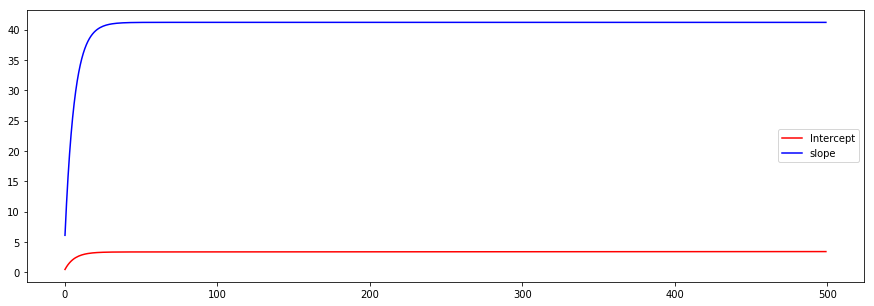

In [95]:
# looks like 500 interations is overkilled.
fig,ax = plt.subplots(figsize=(15,5))
a, = ax.plot(store_m, color='red')
b, = ax.plot(store_b1, color='blue')
plt.legend([a,b],['Intercept', 'slope'])

In [97]:
# need to convert to array or the y_test data in the graph below will be a mess
y_test = np.array(y_test)
X_test = np.array(X_test)

predicted_values = []
for i in range(len(X_test)):
    value = m + b1 * X_test[i]
    predicted_values.append(value)

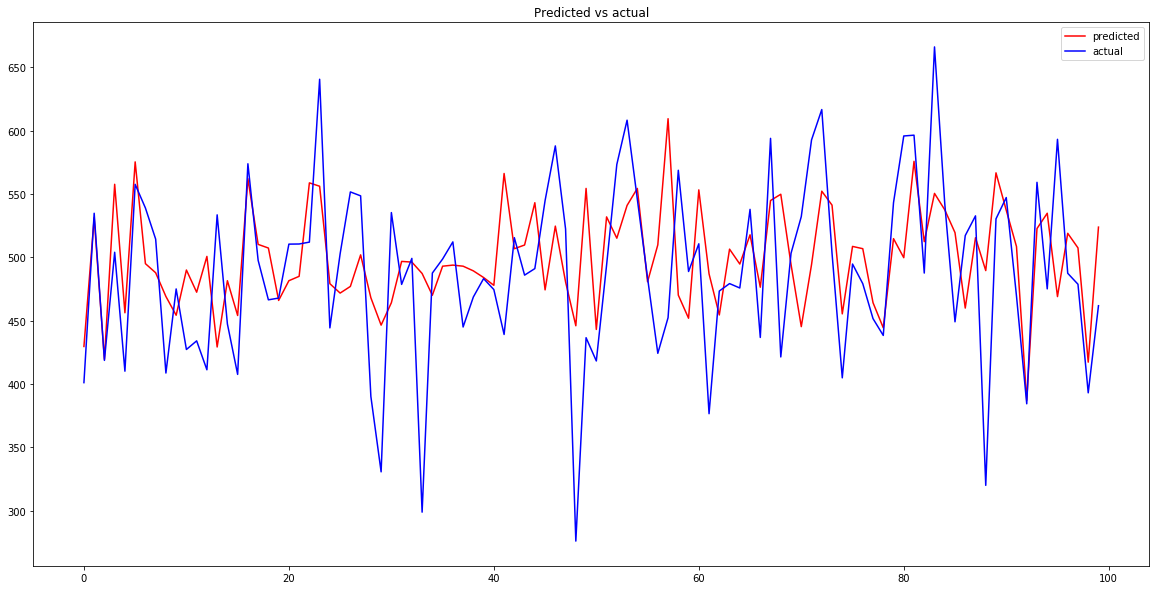

In [98]:
fig,ax = plt.subplots(figsize=(20,10))
a, = ax.plot(predicted_values, color='red')
b, = ax.plot(y_test, color='blue')
plt.title('Predicted vs actual')
plt.legend([a,b],['predicted', 'actual'])

In [99]:
predicted_values = np.array(predicted_values)

Text(0.5,1,'Residual plot')

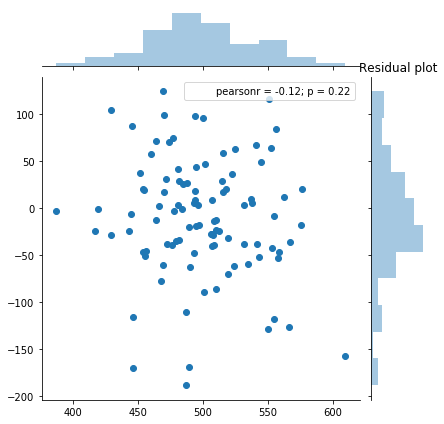

In [100]:
sns.jointplot(predicted_values, y_test -predicted_values )
plt.title('Residual plot')

In [120]:
from sklearn import metrics

In [119]:
total_error = 0.0
for i in range(len(y_test)):
    total_error += (predicted_values[i] - y_test[i])**2
print('Learning rate: ',learning_rate,'  intercept: ', m, '  slop: ',b1)
print('total error: ', total_error)
print('R square: ',metrics.r2_score(y_test, predicted_values))

Learning rate:  0.001   intercept:  3.44358658784   slop:  41.18129445
total error:  407553.137866
R square:  0.176948124122


In [57]:
init_error=0.0
total_error= 0.0

In [58]:
# error for the training set
# increase from 1 training set to k training sets
training_set_error=[]
init_error = 0.0
total_error =0.0
N = len(cv_X_train)

# training = 1
training_set_error.append(0.5 * (((m + b1 * X_train2[0]) - y_train2[0])**2))

for i in range(2, N):
    for j in range(0,i):
        init_error += (((m + b1 * X_train2[j]) - y_train2[j])**2)
    total_error = (1/(2 * i) * init_error)
    training_set_error.append(total_error)
    init_error = 0.0
    total_error =0.0
    if(i == 99):
        for k in range(N):
            init_error += (((m + b1 * X_train2[k]) - y_train2[k])**2)
        total_error = (1/(2 * N) * init_error)
        training_set_error.append(total_error)


In [59]:
# error for the cross validation set
init_error = 0.0
total_error =0.0
cv_training_set_error=[]
N2 = len(cv_X_train)

cv_training_set_error.append(0.5 * ((m + b1 * cv_X_train[0]) - cv_y_train[0])**2)

for i in range(2, N2):
    for j in range(0,i):
        init_error +=(((m + b1 * cv_X_train[j]) - cv_y_train[j])**2)
    total_error = (1/(2 * i) * init_error)
    cv_training_set_error.append(total_error)
    init_error = 0.0
    total_error =0.0
    if(i == 99):
        for k in range(N2):
            init_error += (((m + b1 * X_train2[k]) - y_train2[k])**2)
        total_error = (1/(2 * N2) * init_error)
        cv_training_set_error.append(total_error)


In [60]:
training_size = [int (x)for x in range(len(cv_X_train))]

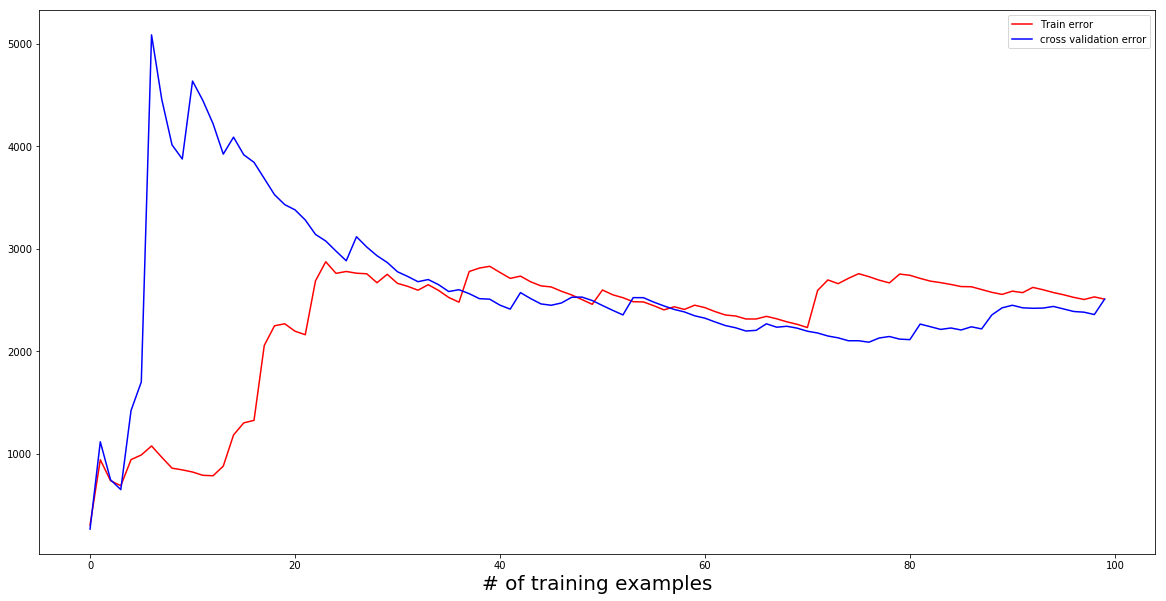

In [61]:
fig,ax = plt.subplots(figsize=(20,10))
a, = ax.plot(training_size,training_set_error, color='red')
b, = ax.plot(training_size,cv_training_set_error, color='blue')
plt.xlabel('# of training examples',size=20)
plt.legend([a,b],['Train error', 'cross validation error'])

In [131]:
init_m = 0
init_b1 = 0
learning_rate2 = 0.00005 # ( last one was 0.001)
store_m = []
store_b1 = []
# number of traiing example here is just 1(time on app), so 1/m is just 1


# training set
def minimize_m_b1(X_train2,y_train2, m, b1, learning_rate2):
    N = int(len(X_train2))
    minimize_m = m
    minimize_b1 = b1
    for i in range(0, len(X_train2)):
        x = X_train2[i]
        y = y_train2[i]
        minimize_m += ( (m + b1 * x) - y)
        minimize_b1 += ( (m + b1 * x) - y) * x
    minimized_m = m - (learning_rate2 *(1/N) * minimize_m)
    minimized_b1 = b1 - (learning_rate2 * (1/N) * minimize_b1)
    store_m.append(minimized_m)
    store_b1.append(minimized_b1)
    return [minimized_m, minimized_b1]


def run_minimize_m_b1(X_train2,y_train2,init_m, init_b1, learning_rate2, num_iteration):
    m = init_m
    b1 = init_b1
    for i in range(num_iteration):
        m,b1 = minimize_m_b1(X_train2,y_train2, m, b1, learning_rate2)
    return [m, b1]


[m, b1] = run_minimize_m_b1(X_train2,y_train2, init_m, init_b1, learning_rate2, num_iteration)
print ("intercept: ",m, "Slope: ",b1)

intercept:  3.3006164004 Slope:  40.197316309


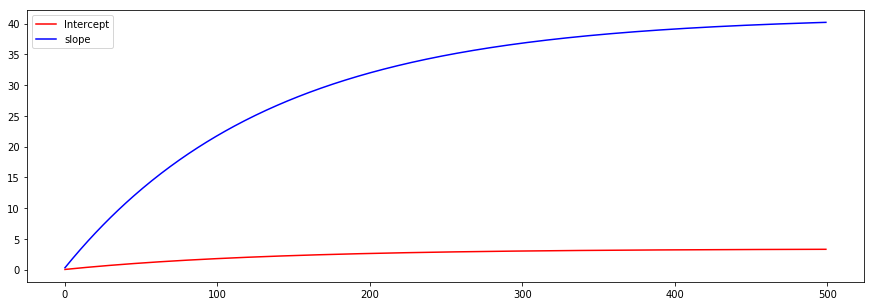

In [132]:
# looks like 500 interations is overkilled.
fig,ax = plt.subplots(figsize=(15,5))
a, = ax.plot(store_m, color='red')
b, = ax.plot(store_b1, color='blue')
plt.legend([a,b],['Intercept', 'slope'])

In [133]:
# need to convert to array or the y_test data in the graph below will be a mess
y_test = np.array(y_test)
X_test = np.array(X_test)

predicted_values = []
for i in range(len(X_test)):
    value = m + b1 * X_test[i]
    predicted_values.append(value)

In [136]:
total_error = 0.0
for i in range(len(y_test)):
    total_error += (predicted_values[i] - y_test[i])**2
print('Learning rate: ',learning_rates,'  intercept: ', m, '  slop: ',b1)
print('total error: ', total_error)
print('R square: ',metrics.r2_score(y_test, predicted_values))

Learning rate:  1e-05   intercept:  3.3006164004   slop:  40.197316309
total error:  395779.606865
R square:  0.200724721273


In [ ]:
# before
Learning rate:  0.001   intercept:  3.44358658784   slop:  41.18129445
total error:  407553.137866
R square:  0.176948124122

In [137]:
predicted_values = []
for i in range(len(X_test)):
    value = m + b1 * X_test[i]
    predicted_values.append(value)

In [142]:
predict_v = np.array(predicted_values)
predict_v.mean()

486.93761599513761

In [143]:
predict_v.std()

39.153831687695664

In [146]:
upper = [predict_v.mean() + predict_v.std() for x in range(len(predicted_values))]
lower = [predict_v.mean() - predict_v.std() for x in range(len(predicted_values))]

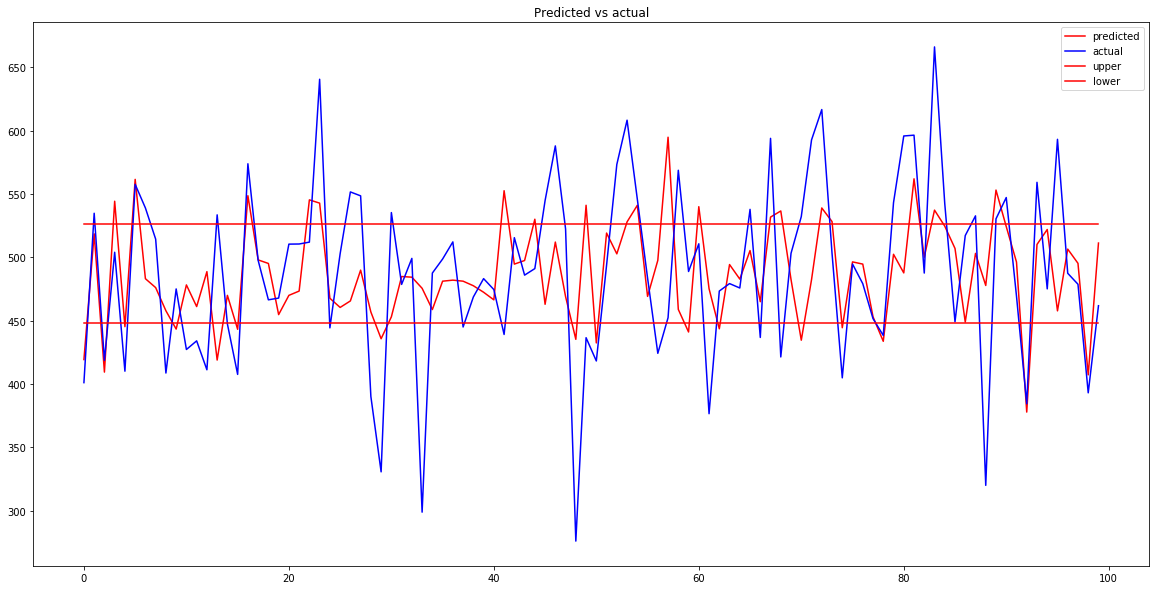

In [147]:
fig,ax = plt.subplots(figsize=(20,10))
a, = ax.plot(predicted_values, color='red')
b, = ax.plot(y_test, color='blue')
c, = ax.plot(upper, color='red')
d, = ax.plot(lower, color='red')

plt.title('Predicted vs actual')
plt.legend([a,b,c,d],['predicted', 'actual','upper', 'lower'])